# Task 1 - Approximating functions

TODO: Possibly think of using cross validation to get best L and epsilon.
see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import randint

from sklearn.utils.fixes import loguniform

from helpers.data import load_linear_dataset, load_nonlinear_dataset
from helpers.models import RidgeRegression, RBFRegression, get_best_model
from helpers.plot import plot_pandas_dataset
from helpers.utils import augment_with_prediction

np.random.seed(69)

### 1 - Download and inspect the datasets

##### 1.1 linear dataset

In [2]:
df_linear = load_linear_dataset()
df_linear


,x,y
0,1.624345,1.218257
1,-0.611756,-0.458842
2,-0.528172,-0.396124
3,-1.072969,-0.804730
4,0.865408,0.649041
...,...,...
995,-0.116444,-0.087331
996,-2.277298,-1.707968
997,-0.069625,-0.052228
998,0.353870,0.265409


No handles with labels found to put in legend.


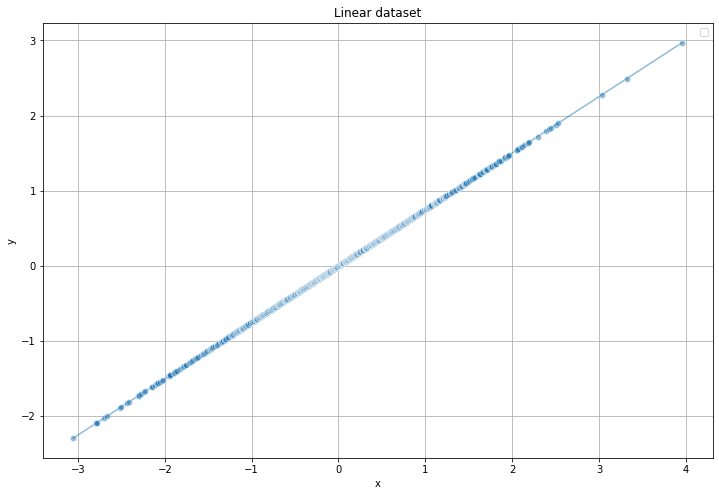

In [3]:
_ = plot_pandas_dataset(df_linear, "x", "y", "Linear dataset", x="x", y="y", marker="o", alpha=0.5)


##### 1.2 nonlinear dataset

In [4]:
df_nonlinear = load_nonlinear_dataset()
df_nonlinear


,x,y
0,1.624345,-1.732828
1,-0.611756,-0.709996
2,-0.528172,-0.630857
3,-1.072969,-0.330732
4,0.865408,0.399216
...,...,...
995,-0.116444,0.387484
996,-2.277298,-0.639435
997,-0.069625,0.535373
998,0.353870,1.443023


No handles with labels found to put in legend.


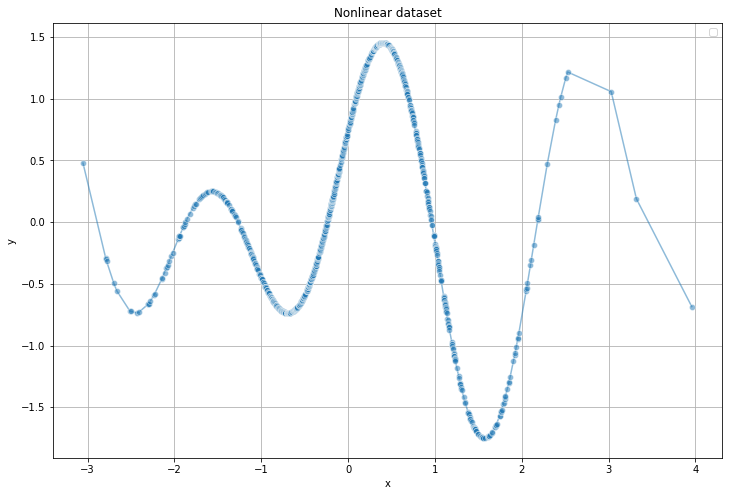

In [5]:
_ = plot_pandas_dataset(df_nonlinear, "x", "y", "Nonlinear dataset", x="x", y="y", marker="o", alpha=0.5)


### 2. Approximate both dataset with a linear regression model

##### 2.1 Linear dataset approximated with linear regression model

In [6]:
param_grid_linear_regression = {"lamb": loguniform(1e-6, 1e-1)}
rr = RidgeRegression()
best_model = get_best_model(param_grid_linear_regression, rr, df_linear.x.values, df_linear.y.values)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best param setting achieved r2 score during cval:
0.9999999998015614
Best params:
{'lamb': 1.9602147192334105e-06}
Scores of best estimator refitted on full data:
{'mae': 8.269183929936736e-06,
 'mape': 9.98492006738974e-05,
 'mse': 1.0611679715515534e-10,
 'r2': 0.9999999998039713,
 'rmse': 1.0301300750640927e-05}


In [7]:
y_pred = best_model.predict(df_linear.x.values)
df_linear_augmented = augment_with_prediction(df_linear, y_pred)
df_linear_augmented


,y,y_pred
x,,
1.624345,1.218257,1.218259
-0.611756,-0.458842,-0.458817
-0.528172,-0.396124,-0.396129
-1.072969,-0.804730,-0.804727
0.865408,0.649041,0.649056
...,...,...
-0.116444,-0.087331,-0.087333
-2.277298,-1.707968,-1.707974
-0.069625,-0.052228,-0.052218


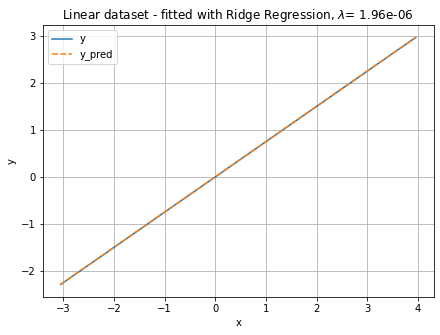

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
title = r"Linear dataset - fitted with Ridge Regression, $\lambda$= {:.2e}".format(best_model.lamb)
ax = plot_pandas_dataset(df_linear_augmented, "x", "y", title, ax=ax)
fig.savefig("plots/1_linear_dataset_linear_regression.pdf", bbox_inches="tight")


##### 2.2 Nonlinear dataset approximated with linear regression model

In [9]:
param_grid_linear_regression = {"lamb": loguniform(1e-6, 1e-1)}
rr = RidgeRegression()
best_model = get_best_model(param_grid_linear_regression, rr, df_nonlinear.x.values, df_nonlinear.y.values, n_iter=100)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best param setting achieved r2 score during cval:
-0.03301146229251066
Best params:
{'lamb': 0.08185813440663255}
Scores of best estimator refitted on full data:
{'mae': 0.736100225222222,
 'mape': 1.095018624158038,
 'mse': 0.7748919879088906,
 'r2': -0.015115828406836895,
 'rmse': 0.8802794941999333}


In [10]:
y_pred = best_model.predict(df_nonlinear.x.values)
df_nonlinear_augmented = augment_with_prediction(df_nonlinear, y_pred)
df_nonlinear_augmented


,y,y_pred
x,,
1.624345,-1.732828,0.053941
-0.611756,-0.709996,-0.020315
-0.528172,-0.630857,-0.017539
-1.072969,-0.330732,-0.035631
0.865408,0.399216,0.028738
...,...,...
-0.116444,0.387484,-0.003867
-2.277298,-0.639435,-0.075623
-0.069625,0.535373,-0.002312


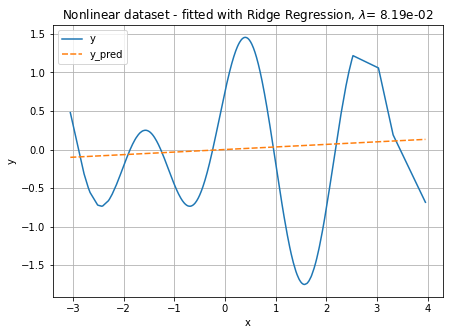

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
title = r"Nonlinear dataset - fitted with Ridge Regression, $\lambda$= {:.2e}".format(best_model.lamb)
ax = plot_pandas_dataset(df_nonlinear_augmented, "x", "y", title, ax=ax)
fig.savefig("plots/1_nonlinear_dataset_linear_regression.pdf", bbox_inches="tight")


### 3. Approximate both datasets with RBF regression

##### 3.1 Linear dataset approximated with RBF regression

In [12]:
param_grid_rbf_regression = {
    "lamb": loguniform(1e-6, 1e-1),
    "eps": loguniform(1e-2, 1e2),
    "L": randint(1, df_linear.shape[0]),
}
rbf = RBFRegression()
best_model = get_best_model(param_grid_rbf_regression, rbf, df_linear.x.values, df_linear.y.values, n_iter=100)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best param setting achieved r2 score during cval:
0.9999999674064904
Best params:
{'L': 111, 'eps': 14.416664208796794, 'lamb': 0.0009607218793996042}
Scores of best estimator refitted on full data:
{'mae': 0.005534909544175919,
 'mape': 0.016396030180325198,
 'mse': 9.982860958350952e-05,
 'r2': 0.9998155874154019,
 'rmse': 0.009991426804191158}


In [13]:
y_pred = best_model.predict(df_linear.x.values)
df_linear_augmented = augment_with_prediction(df_linear, y_pred)
df_linear_augmented


,y,y_pred
x,,
1.624345,1.218257,1.218231
-0.611756,-0.458842,-0.464244
-0.528172,-0.396124,-0.400824
-1.072969,-0.804730,-0.812481
0.865408,0.649041,0.656129
...,...,...
-0.116444,-0.087331,-0.087738
-2.277298,-1.707968,-1.695701
-0.069625,-0.052228,-0.052106


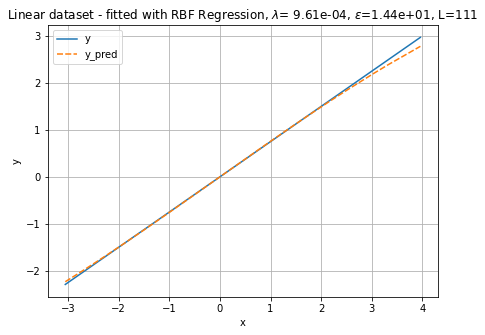

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
title = r"Linear dataset - fitted with RBF Regression, $\lambda$= {:.2e}, $\epsilon$={:.2e}, L={}".format(
    best_model.lamb, best_model.eps, best_model.L
)
ax = plot_pandas_dataset(df_linear_augmented, "x", "y", title, ax=ax)
fig.savefig("plots/1_linear_dataset_rbf_regression.pdf", bbox_inches="tight")


##### 3.2 Nonlinear dataset approximated with RBF regression

In [15]:
param_grid_rbf_regression = {
    "lamb": loguniform(1e-6, 1e-1),
    "eps": loguniform(1e-2, 1e2),
    "L": randint(1, df_nonlinear.shape[0]),
}
rbf = RBFRegression()
best_model = get_best_model(param_grid_rbf_regression, rbf, df_nonlinear.x.values, df_nonlinear.y.values, n_iter=100)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best param setting achieved r2 score during cval:
0.9999763110467864
Best params:
{'L': 564, 'eps': 0.9822355353012006, 'lamb': 3.3150535798148605e-05}
Scores of best estimator refitted on full data:
{'mae': 0.0005455367320280516,
 'mape': 0.0035764055044734074,
 'mse': 3.3307356795719803e-06,
 'r2': 0.9999956367047778,
 'rmse': 0.0018250303229184934}


In [16]:
y_pred = best_model.predict(df_nonlinear.x.values)
df_nonlinear_augmented = augment_with_prediction(df_nonlinear, y_pred)
df_nonlinear_augmented


,y,y_pred
x,,
1.624345,-1.732828,-1.733953
-0.611756,-0.709996,-0.709841
-0.528172,-0.630857,-0.630725
-1.072969,-0.330732,-0.330847
0.865408,0.399216,0.398466
...,...,...
-0.116444,0.387484,0.387254
-2.277298,-0.639435,-0.641973
-0.069625,0.535373,0.535123


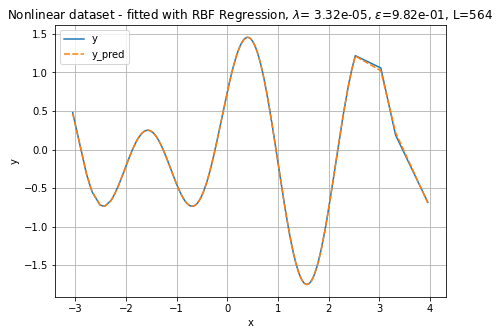

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
title = r"Nonlinear dataset - fitted with RBF Regression, $\lambda$= {:.2e}, $\epsilon$={:.2e}, L={}".format(
    best_model.lamb, best_model.eps, best_model.L
)
ax = plot_pandas_dataset(df_nonlinear_augmented, "x", "y", title, ax=ax)
fig.savefig("plots/1_nonlinear_dataset_rbf_regression.pdf", bbox_inches="tight")
